1. Data Exploration

In [ ]:
import pandas as pd # importig libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Titanic_train.csv')# data contains 891 rows and 12 colums
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Dropping column: cabin, PassengerId, Name, Ticket  info is irrelevant in our analysis so we can drop these columns entirely
df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#checking for missing values
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
#Imputing 'Age' with mean/median is a simple and effective approach when the missing data is not substantial.
#in my case im replacing missing values of age column with mean. and embarked col with mode
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-14-c282b26452ba>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-14-c282b26452ba>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
df.isna().sum()
# now there are no missing values in the dataframe

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
# Explore the distribution of numerical features.
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


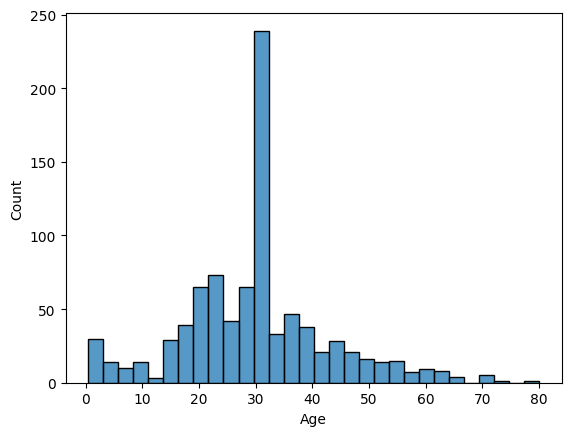

In [ ]:
sns.histplot(df['Age'])
plt.show()
# most of the people died arein the age of 30 -34

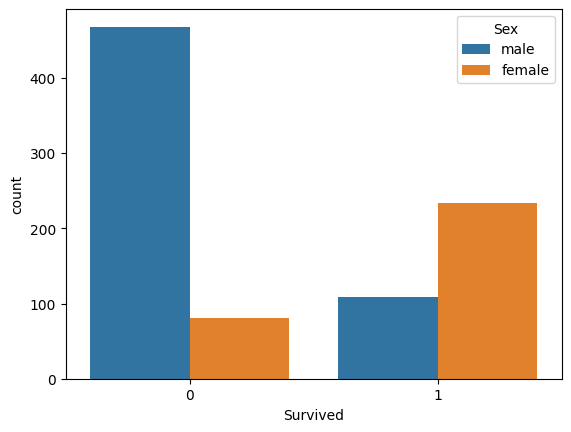

In [ ]:
# Explore the relationship between categorical features.
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()

In [ ]:
# most death are of men , survival rate of females are superial.

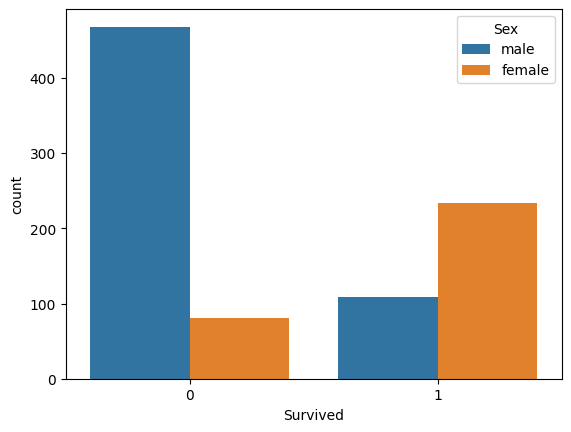

In [ ]:
# Explore the relationship between categorical features.
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()


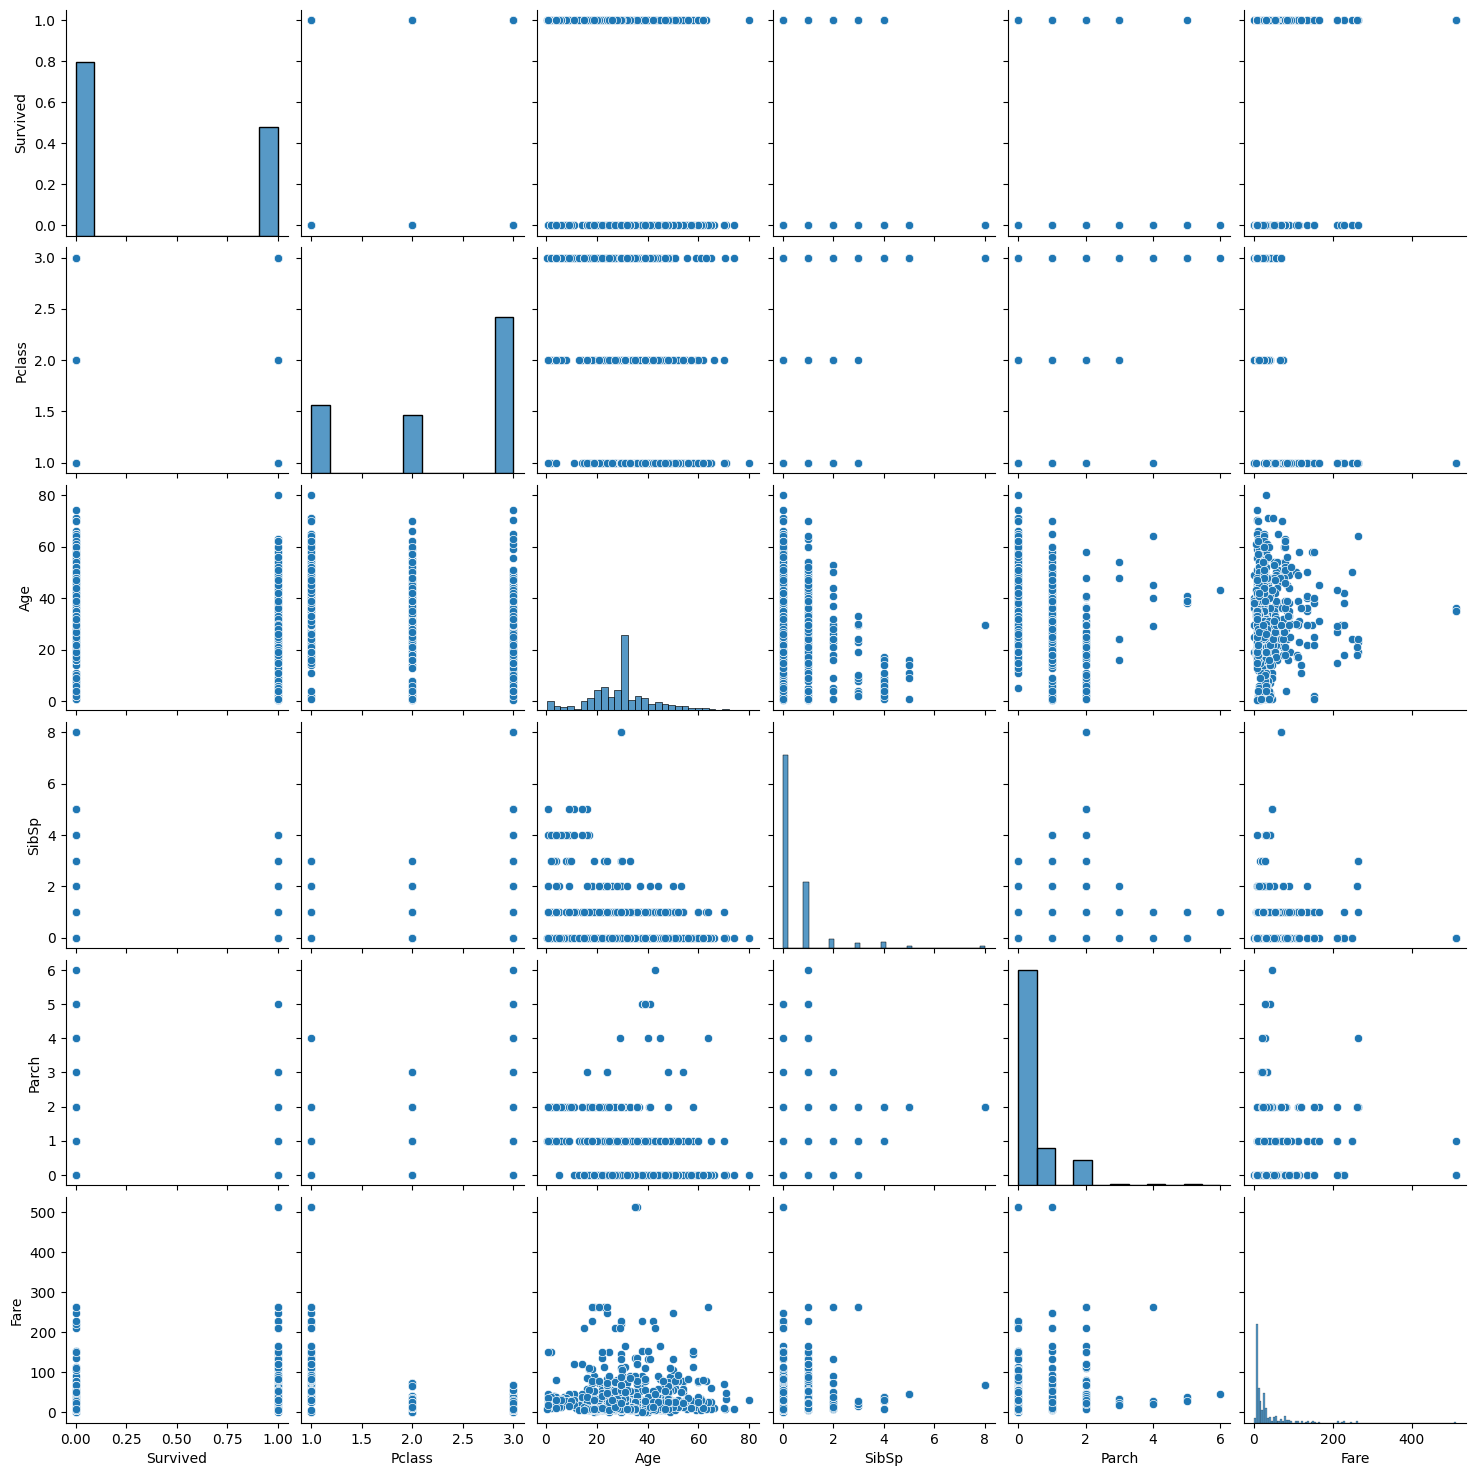

In [ ]:
sns.pairplot(df
)

Encoding Categorical Features:


In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
#Categorical features 'Sex' and 'Embarked' are converted into numerical representations using one-hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder # used one hot encoding for converting categorical variable into numeric.
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[['Sex', 'Embarked']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

In [ ]:
encoded_df

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.0,0.0,1.0
888,1.0,0.0,0.0,0.0,1.0
889,0.0,1.0,1.0,0.0,0.0


In [ ]:
combined_df = pd.concat([df, encoded_df], axis=1) # now combiniiing encoded dataframe with original dataframe


In [ ]:
combined_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.000000,1,0,7.2500,S,0.0,1.0,0.0,0.0,1.0
1,1,1,female,38.000000,1,0,71.2833,C,1.0,0.0,1.0,0.0,0.0
2,1,3,female,26.000000,0,0,7.9250,S,1.0,0.0,0.0,0.0,1.0
3,1,1,female,35.000000,1,0,53.1000,S,1.0,0.0,0.0,0.0,1.0
4,0,3,male,35.000000,0,0,8.0500,S,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0.0,1.0,0.0,0.0,1.0
887,1,1,female,19.000000,0,0,30.0000,S,1.0,0.0,0.0,0.0,1.0
888,0,3,female,29.699118,1,2,23.4500,S,1.0,0.0,0.0,0.0,1.0
889,1,1,male,26.000000,0,0,30.0000,C,0.0,1.0,1.0,0.0,0.0


In [ ]:


combined_df.drop(['Sex', 'Embarked'], axis=1, inplace=True)
combined_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.000000,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.000000,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.000000,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.000000,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
887,1,1,19.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
888,0,3,29.699118,1,2,23.4500,1.0,0.0,0.0,0.0,1.0
889,1,1,26.000000,0,0,30.0000,0.0,1.0,1.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler # scaling down values
scaler = StandardScaler()
combined_df[['Age', 'Fare']] = scaler.fit_transform(combined_df[['Age', 'Fare']])
combined_df


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.592481,1,0,-0.502445,0.0,1.0,0.0,0.0,1.0
1,1,1,0.638789,1,0,0.786845,1.0,0.0,1.0,0.0,0.0
2,1,3,-0.284663,0,0,-0.488854,1.0,0.0,0.0,0.0,1.0
3,1,1,0.407926,1,0,0.420730,1.0,0.0,0.0,0.0,1.0
4,0,3,0.407926,0,0,-0.486337,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,-0.207709,0,0,-0.386671,0.0,1.0,0.0,0.0,1.0
887,1,1,-0.823344,0,0,-0.044381,1.0,0.0,0.0,0.0,1.0
888,0,3,0.000000,1,2,-0.176263,1.0,0.0,0.0,0.0,1.0
889,1,1,-0.284663,0,0,-0.044381,0.0,1.0,1.0,0.0,0.0


model building

In [ ]:
# building a logistic regression model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# importing important librabries for regression

In [ ]:
# splitting data into training and testing

In [ ]:
x = combined_df.drop('Survived', axis=1)  # Features
y = combined_df['Survived']  # Target variable

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

In [ ]:
#Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)  # Training the model

LogisticRegression()

In [ ]:
y_pred = model.predict(x) # predict for x

In [ ]:
y_pred # y hat values for x

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
y_pred_df= pd.DataFrame({'Y': y,
                         'Yhat': model.predict(x)})

In [ ]:
y_pred_df

,Y,Yhat
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,0
889,1,1


In [ ]:
# Confusion Matrix for the model accuracy  TP   FP
#                                          FN   TN
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[475  74]
 [101 241]]


In [ ]:
((475+241)/(475+74+101+241))*100 #Accuracy

80.3591470258137

In [ ]:
# ROC Curve

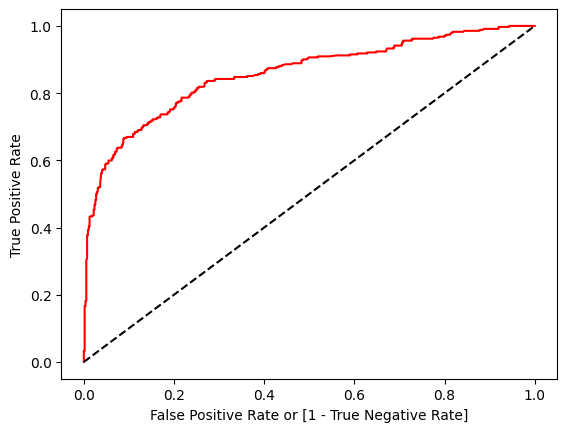

In [ ]:
from sklearn.metrics import roc_curve #roc-receiver operating characteristic
from sklearn.metrics import roc_auc_score # auc-area under curve

fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:,1])
# we want to predict probability values for x data
# predict_proba returns probability estimates for all classes
# and the results are ordered by the label of classes i.e. 0 and 1.
# [:,1] will get the predicted probabilities of the positive label only
# here we will get false positive rate, true positive rate and threshold values
auc = roc_auc_score(y, y_pred)# compute roc_auc_score based on y and y predicted

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')# x axis range is 0 to 1, y axis range is 0 to 1, k-- is a line type - dotted
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show() # red one is roc curve

In [ ]:
# Interpretation

The Streamlit app allows users to explore the Titanic dataset and the predictions of the Logistic Regression model. It provides a way to understand the factors that influenced survival and to see how different passenger characteristics might affect the outcome.


Understand the predictions of the Logistic Regression model.
Explore factors that influenced survival.
Develop hypotheses about survival patterns.

In [ ]:
import pickle
# model conversioninto binary format is called as pickling

In [ ]:
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
pickle.dump(encoder, open('encoder.pkl', 'wb'))

In [ ]:
print(combined_df.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
